<a href="https://colab.research.google.com/github/EstephanyReyes/procesos-estocasticos/blob/main/Prueba_de_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba de frecuencias

Aluma: Reyes Fuentes Estephany Carolina

Esta prueba verifica si la muestra proviene de una distribución uniforme $U(0,1)$

Las hipótesis son:

$H_0$: La muestra proviene de una distribución $U(0,1)$

$H_a$: La muestra no proviene de una distribución $U(0,1)$

Y el estadístico de prueba es:
$$
\chi^2 = \sum_{i=1}^{k} \frac{(f_{o} - f_e)^2}{f_e}
$$

In [1]:
import numpy as np
import scipy.stats as st
from IPython.display import display, Markdown
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as ptl

In [2]:
#importar datos
url = "https://raw.githubusercontent.com/EstephanyReyes/procesos-estocasticos/main/datos"
datos = np.loadtxt(url)


In [3]:

intervalos = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
k = 5
n = len(datos)

In [4]:
#frecuencias observadas

fo = [0,0,0,0,0]

for x in datos:
    if 0 <= x < 0.2:
        fo[0] += 1
    elif 0.2 <= x < 0.4:
        fo[1] += 1
    elif 0.4 <= x < 0.6:
        fo[2] += 1
    elif 0.6 <= x < 0.8:
        fo[3] += 1
    elif 0.8 <= x <= 1.0:
        fo[4] += 1

print("Frecuencias observadas:", fo)

Frecuencias observadas: [21, 22, 19, 23, 15]


In [16]:
# Frecuencia esperada
fe = n / k

chi_parcial = [((obs - fe)**2)/fe for obs in fo]

tabla = pd.DataFrame({
    "intervalo": ["[0,0.2)", "[0.2,0.4)", "[0.4,0.6)", "[0.6,0.8)", "[0.8,1.0]"],
    "frecuencia observada (fo)": fo,
    "frecuencia esperada (fe)": [fe]*k,
    "(fo-fe)^2 / fe": chi_parcial
})
tabla.index = [""] * len(tabla)
tabla


,intervalo,frecuencia observada (fo),frecuencia esperada (fe),(fo-fe)^2 / fe
,"[0,0.2)",21,20.0,0.05
,"[0.2,0.4)",22,20.0,0.20
,"[0.4,0.6)",19,20.0,0.05
,"[0.6,0.8)",23,20.0,0.45
,"[0.8,1.0]",15,20.0,1.25


In [6]:
chi_total = sum(chi_parcial)
print("Chi-cuadrada total:", chi_total)

Chi-cuadrada total: 2.0


In [7]:

gl = 4
alpha = 0.05

chi_critico = chi2.ppf(1 - alpha, gl)

print("Chi-cuadrada valor crítico:", chi_critico)

Chi-cuadrada valor crítico: 9.487729036781154


In [8]:
if chi_total < chi_critico:
    display(Markdown("No se rechaza $H_0$: La muestra proviene de una distribución $U(0,1)$"))
else:
    display(Markdown("Se rechaza $H_0$: La muestra no proviene de una distribución $U(0,1)$"))

No se rechaza $H_0$: La muestra proviene de una distribución $U(0,1)$

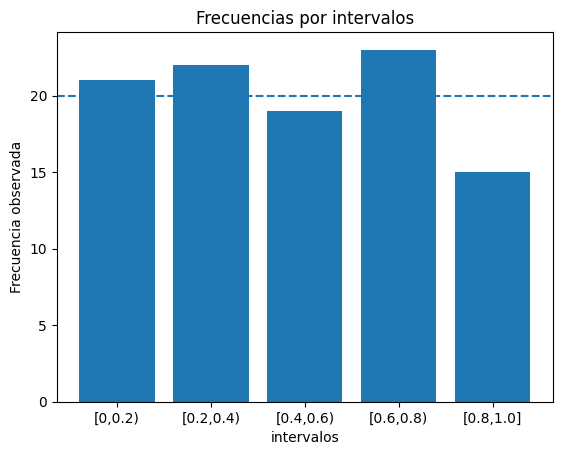

In [15]:
intervalos =  [0, 0.2, 0.4, 0.6, 0.8, 1.0]
fo, _= np.histogram(datos, bins=intervalos)
intervalos_txt= ("[0,0.2)", "[0.2,0.4)", "[0.4,0.6)", "[0.6,0.8)", "[0.8,1.0]")
ptl.figure()
ptl.bar(intervalos_txt, fo)
ptl.axhline(y=fe, linestyle='--')
ptl.xlabel("intervalos")
ptl.ylabel("Frecuencia observada")
ptl.title("Frecuencias por intervalos")
ptl.show()